# Visulaze Results
This file implements the visualization of final results

In [1]:
import pandas as pd
import numpy as np
from sklearn.externals import joblib
import matplotlib.pyplot as plt

D:\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
# load from tree_based models and MLP.ipynb and from linear and stacking.ipynb respectively
dic1 = joblib.load('linear_stacking.pkl')
dic2 = joblib.load('tree_nn.pkl')

In [3]:
names = []
evs_train = []
rmse_train = []
mae_train = []
r2_train = []
evs_test = []
rmse_test = []
mae_test = []
r2_test = []
# append names
for i in dic1['model_names']:
    names.append(i)
for j in dic2['model_names']:
    names.append(j)
    
# append esv (explained variance score)
for i in dic1['evs']:
    evs_train.append(i[0])
    evs_test.append(i[1])
for i in dic2['evs']:
    evs_train.append(i[0])
    evs_test.append(i[1])

# append mae
for i in dic1['mae']:
    mae_train.append(i[0])
    mae_test.append(i[1])
for i in dic2['mae']:
    mae_train.append(i[0])
    mae_test.append(i[1])
    
# append rmse
for i in dic1['rmse']:
    rmse_train.append(i[0])
    rmse_test.append(i[1])
for i in dic2['rmse']:
    rmse_train.append(i[0])
    rmse_test.append(i[1])
    
# append r2
for i in dic1['r2']:
    r2_train.append(i[0])
    r2_test.append(i[1])
for i in dic2['r2']:
    r2_train.append(i[0])
    r2_test.append(i[1])

In [4]:
dic_train = {'Model':names,'EVS':evs_train,'MAE': mae_train, 'RMSE': rmse_train, 'R2':r2_train}
train = pd.DataFrame(dic_train)
train

,Model,EVS,MAE,RMSE,R2
0,Linear Regression,0.385312,4859.832207,6699.255671,0.385312
1,LinearSVR,0.236565,4341.663561,7624.800752,0.203734
2,SGDRegressor,0.385311,4860.454548,6699.264372,0.385311
3,Ridge Regressor,0.385312,4859.867176,6699.255674,0.385312
4,Bagging,0.980427,710.250480,1195.670966,0.980419
5,AdaBoost,0.627827,5385.501149,6235.356354,0.467495
6,stack_bagging,0.589696,3999.443625,5475.675821,0.589345
7,stack_boosting,0.587589,4755.334811,5840.598381,0.532786
8,stack_rf,0.582976,4028.207837,5524.592448,0.581975
9,stack_mlp,0.582909,4019.171130,5631.208885,0.565685


In [9]:
train['EVS'] = round(train['EVS'],4)
train['MAE'] = round(train['MAE'],2)
train['RMSE'] = round(train['RMSE'],2)
train['R2'] = round(train['R2'],4)

In [11]:
# train.to_csv('../Report/figures/train_res.csv')

In [22]:
dic_test = {'Model':names,'EVS':evs_test,'MAE': mae_test, 'RMSE': rmse_test, 'R2':r2_test}
test = pd.DataFrame(dic_test)
test

,Model,EVS,MAE,RMSE,R2
0,Linear Regression,0.346929,4940.680292,6846.843429,0.346663
1,LinearSVR,0.171175,4375.650624,7839.591644,0.143469
2,SGDRegressor,0.346987,4941.272318,6846.510095,0.346727
3,Ridge Regressor,0.346931,4940.713708,6846.836165,0.346664
4,Bagging,0.863659,2016.574435,3128.139770,0.863627
5,AdaBoost,0.614581,5417.189535,6290.151708,0.448585
6,stack_bagging,0.561408,4092.371067,5611.079446,0.561218
7,stack_boosting,0.571513,4821.380409,5917.836178,0.511930
8,stack_rf,0.559991,4094.318285,5624.665315,0.559090
9,stack_mlp,0.561111,4068.156028,5700.790220,0.547075


In [25]:
test['EVS'] = round(test['EVS'],4)
test['MAE'] = round(test['MAE'],2)
test['RMSE'] = round(test['RMSE'],2)
test['R2'] = round(test['R2'],4)

In [15]:
# test.to_csv('../Report/figures/test_res.csv')

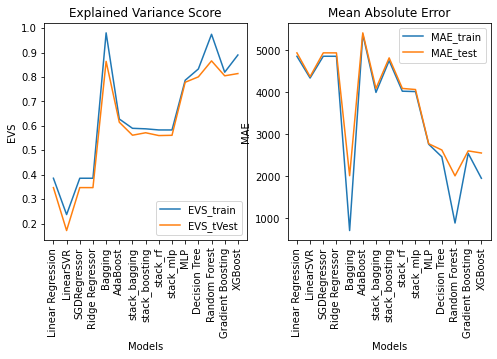

In [30]:
# plot
fig = plt.figure(figsize=(8,4))
xx = names
ax1 = fig.add_subplot(1,2,1)
plt.tick_params()
plt.plot(xx, train['EVS'], label = 'EVS_train')
plt.plot(xx, test['EVS'], label = 'EVS_tVest')
plt.legend()
plt.title('Explained Variance Score')
plt.xlabel('Models')
plt.ylabel('EVS')
plt.xticks(xx, rotation='vertical')

ax2 = fig.add_subplot(1,2,2)
plt.tick_params()
plt.plot(xx, train['MAE'], label = 'MAE_train')
plt.plot(xx, test['MAE'], label = 'MAE_test')
plt.legend()
plt.title('Mean Absolute Error')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.xticks(xx, rotation='vertical')
# plt.savefig('../Report/figures/final1.png')
plt.show()

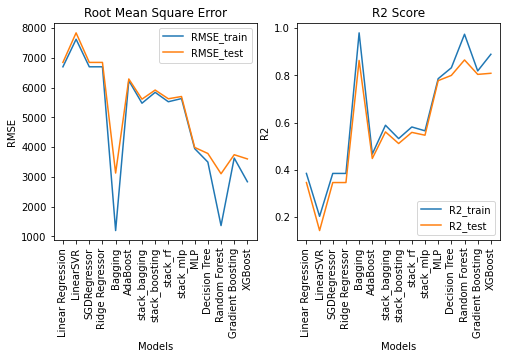

In [31]:
fig = plt.figure(figsize=(8,4))
ax33 = fig.add_subplot(1,2,1)
plt.tick_params()
plt.plot(xx, train['RMSE'], label = 'RMSE_train')
plt.plot(xx, test['RMSE'], label = 'RMSE_test')
plt.legend()
plt.title('Root Mean Square Error')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(xx, rotation='vertical')


ax44 = fig.add_subplot(1,2,2)
plt.tick_params()
plt.plot(xx, train['R2'], label = 'R2_train')
plt.plot(xx, test['R2'], label = 'R2_test')
plt.legend()
plt.title('R2 Score')
plt.xlabel('Models')
plt.ylabel('R2')
plt.xticks(xx, rotation='vertical')
plt.savefig('../Report/figures/final2.png')
plt.show()